In [15]:
import fitting_functions as fitting 
from spacetime_plot import plot_fitbounds, plot_fit
from edes.modules.detection.detection_utils import plot, plot_ax, plot_errbar, big_plt_font
import numpy as np 
import matplotlib.pyplot as plt 
import h5py
import os
from scipy.special import gammainc

result_base = r'C:\\Users\\andrish'
plt.rcParams.update({'font.size': 14,
                     'lines.markersize': 12,
                     'lines.linewidth': 2.5,
                     'xtick.labelsize': 15,
                     'ytick.labelsize': 15,
                     'errorbar.capsize': 2})

In [70]:
def read_h5(result_path, xname, yname, print_name=False):
    file_path = f'{result_base}/{result_path}'
    with h5py.File(file_path, 'r') as file:
        dataset_names = list(file['datasets'].keys())
        data_dict = {name: np.array(file['datasets'][name][()]) for name in dataset_names}
        if print_name: 
            print(data_dict)
    return np.array(data_dict[xname]), np.array(data_dict[yname])

def plot_power_and_counts(file, anchor1=(1.1,1.02), anchor2=(1.1,0.9)): 
    VRF, power_nW = read_h5(file, 'RF_voltage', "SSA_power")
    _, counts = read_h5(file, 'RF_voltage', "optimize.result.countrate_ROI")
    power_dBm = 10*np.log10(power_nW/1e6)
    fig, ax = plt.subplots() 
    ax2 = ax.twinx()
    plot_ax(ax, VRF, power_dBm, '.--', ylabel='Detected power (dBm)', xlabel='RF source voltage (V)', label='SA power')
    plot_ax(ax2, VRF, counts, '.--', c='C1', label='MCP counts', ylabel='MCP counts')
    ax2.grid(False)
    ax.legend(bbox_to_anchor=anchor1) 
    ax2.legend(bbox_to_anchor=anchor2) 
    plt.show()

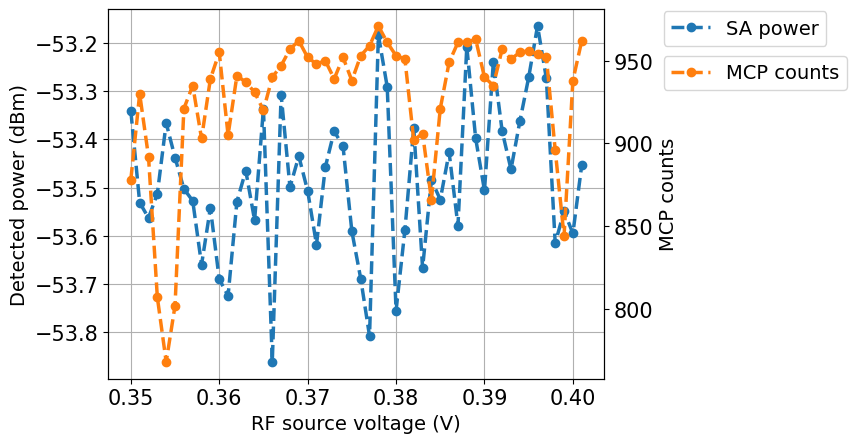

In [67]:
file = f'artiq/experiment/artiq-master/results/2025-09-16/19/000008183-RF_power_scan.h5'
plot_power_and_counts(file)

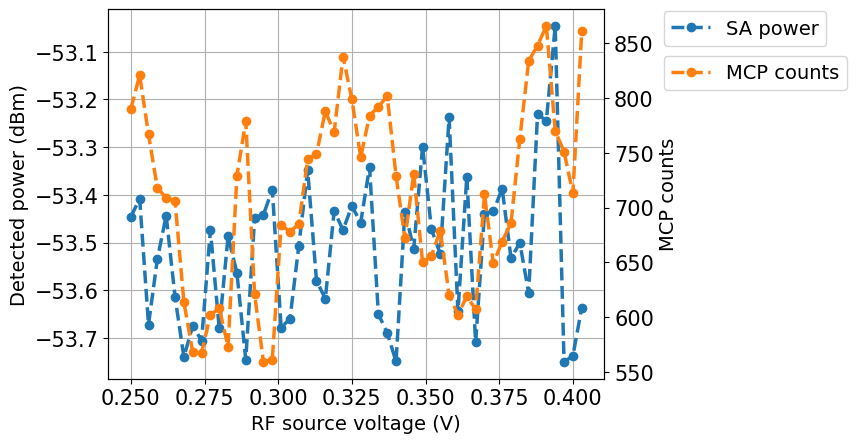

In [68]:
file = f'artiq/experiment/artiq-master/results/2025-09-16/19/000008182-RF_power_scan.h5'
plot_power_and_counts(file)

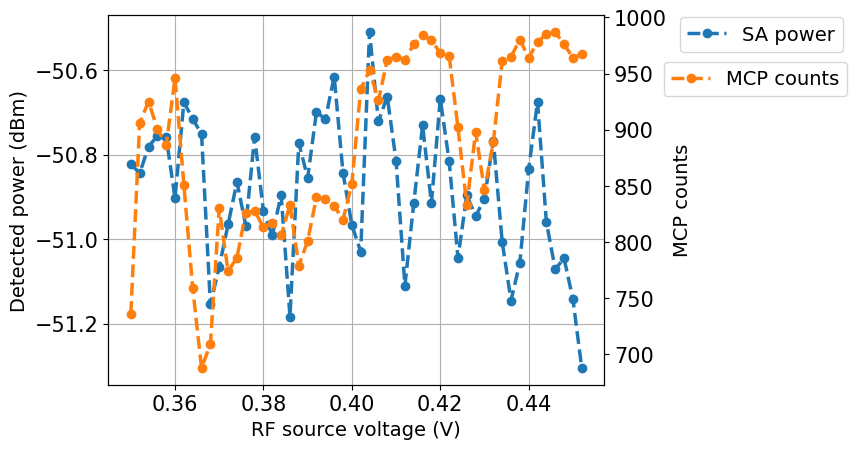

In [77]:
file = f'artiq/experiment/artiq-master/results/2025-09-16/20/000008197-RF_power_scan.h5'
plot_power_and_counts(file, anchor1=(1.5, 1.02))

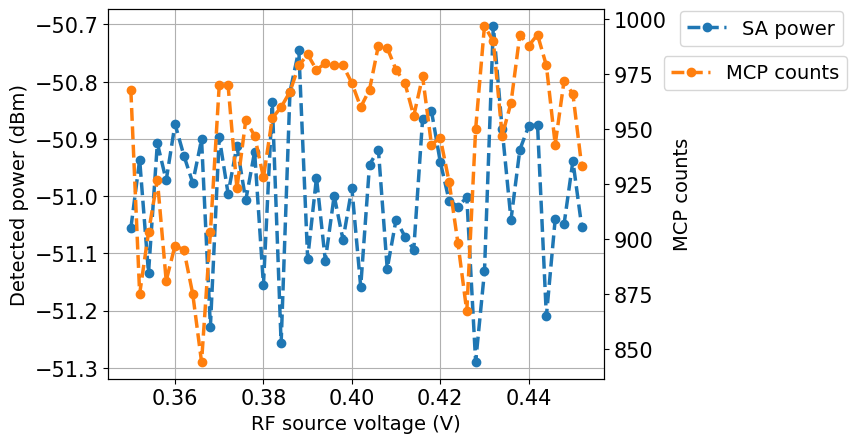

In [78]:
file = f'artiq/experiment/artiq-master/results/2025-09-16/20/000008198-RF_power_scan.h5'
plot_power_and_counts(file, anchor1=(1.5, 1.02))

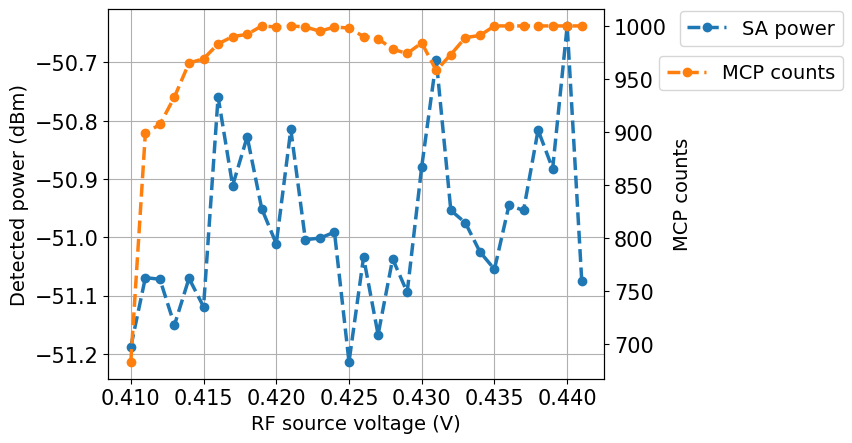

In [80]:
file = f'artiq/experiment/artiq-master/results/2025-09-16/20/000008199-RF_power_scan.h5'
plot_power_and_counts(file, anchor1=(1.5, 1.02), anchor2=(1.5, 0.9))